In [1]:
import matplotlib.pyplot as plt
from scipy.stats import entropy
import skmob
from skmob.measures.individual import real_entropy, uncorrelated_entropy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("csv files/labeled_ads.csv")
data_entr = pd.read_csv(
#    "csv files/all_ent.csv",
#    index_col=0,
#)

## filtering with thresholds

In [52]:
threshold_2 = data[data["top_score"] >= 0.2]  # from 459.728 to 457.609  # 517 politicians (1 is filtered away)
threshold_4 = data[data["top_score"] >= 0.4]  # from 459.728 to 442.854  # 516 politicians (2 is filtered away)

## running through threshold >= 2

In [ ]:
threshold_2 = threshold_2[["page_id", "top_label", "ad_creation_time"]]

threshold_2["top_label_int"] = (
    pd.factorize(threshold_2["top_label"], sort=True)[0] + 1
)  # convert Categories to float starting from 1.0 alphabetically

threshold_2["lat"] = 0.0

tdf_2 = skmob.TrajDataFrame(
    threshold_2,
    latitude="lat",
    longitude="top_label_int",
    datetime="ad_creation_time",
    user_id="page_id",
)

In [32]:
# uncorrelated + real entropy
ue_df_2 = uncorrelated_entropy(tdf_2, normalize=False)
#re_df_2 = real_entropy(tdf_2)

100%|██████████| 517/517 [00:05<00:00, 92.58it/s] 


In [33]:
data_un = data_entr.drop_duplicates(
    subset=["page_id"]
)  # narrowing down to 518 politicians
data_un = pd.merge(
    data_un, ue_df_2, left_on="page_id", right_on="uid", how="left"
)  # mapping uncorrealted values back to dataframe with 518 politicians
data_un = data_un.drop("uid", axis=1)
data_un.rename(
    columns={
        "uncorrelated_entropy_x": "uncor_entropy",
        "uncorrelated_entropy_y": "uncor_entropy >= 0.2",
    },
    inplace=True,
)

## running through threshold >= 4

In [34]:
# b = pd.read_csv("/Users/sofiepalmuskronborg/Desktop/minus_ba.csv", index_col=0)
threshold_4 = threshold_4[["page_id", "top_label", "ad_creation_time"]]

threshold_4["top_label_int"] = (
    pd.factorize(threshold_4["top_label"], sort=True)[0] + 1
)  # convert Categories to float starting from 1.0 alphabetically

threshold_4["lat"] = 0.0

tdf_4 = skmob.TrajDataFrame(
    threshold_4,
    latitude="lat",
    longitude="top_label_int",
    datetime="ad_creation_time",
    user_id="page_id",
)

In [ ]:
# uncorrelated + real entropy
ue_df_4 = uncorrelated_entropy(tdf_4, normalize=False)
re_df_4 = real_entropy(tdf_4)

100%|██████████| 516/516 [00:06<00:00, 79.19it/s] 


In [36]:
data_un = pd.merge(
    data_un, ue_df_4, left_on="page_id", right_on="uid", how="left"
)  # mapping uncorrealted values back to dataframe with 518 politicians
data_un = data_un.drop("uid", axis=1)
data_un.rename(
    columns={
        "uncorrelated_entropy": "uncor_entropy >= 0.4",
    },
    inplace=True,
)

## Special case for the two biggest players

In [ ]:
filtered_data_a_2 = threshold_2[
    threshold_2["page_id"].isin([1316372698453411])
]  # bernie sanders
midpoint = len(filtered_data_a_2) // 2

# Split the DataFrame into two parts
df_part1_a_2 = filtered_data_a_2.iloc[:midpoint]
df_part2_a_2 = filtered_data_a_2.iloc[midpoint:]

df_part1_a_2["page_id"] = df_part1_a_2["page_id"].replace(1316372698453411, 130000000000000)
df_part2_a_2["page_id"] = df_part2_a_2["page_id"].replace(1316372698453411, 130000000000001)

In [ ]:
filtered_data_a_4 = threshold_4[
    threshold_4["page_id"].isin([1316372698453411])
]  # bernie sanders
midpoint = len(filtered_data_a_4) // 2

# Split the DataFrame into two parts
df_part1_a_4 = filtered_data_a_4.iloc[:midpoint]
df_part2_a_4 = filtered_data_a_4.iloc[midpoint:]

df_part1_a_4["page_id"] = df_part1_a_4["page_id"].replace(1316372698453411, 130000000000000)
df_part2_a_4["page_id"] = df_part2_a_4["page_id"].replace(1316372698453411, 130000000000001)

In [ ]:
filtered_data_b_2 = threshold_2[
    threshold_2["page_id"].isin([124955570892789])
]  # ocasio-Cortez
midpoint = len(filtered_data_b_2) // 2

# Split the DataFrame into two parts
df_part1_b_2 = filtered_data_b_2.iloc[:midpoint]
df_part2_b_2 = filtered_data_b_2.iloc[midpoint:]

df_part1_b_2["page_id"] = df_part1_b_2["page_id"].replace(124955570892789, 120000000000000)
df_part2_b_2["page_id"] = df_part2_b_2["page_id"].replace(124955570892789, 120000000000001)

In [ ]:
filtered_data_b_4 = threshold_4[
    threshold_4["page_id"].isin([124955570892789])
]  # ocasio-Cortez
midpoint = len(filtered_data_b_4) // 2

# Split the DataFrame into two parts
df_part1_b_4 = filtered_data_b_4.iloc[:midpoint]
df_part2_b_4 = filtered_data_b_4.iloc[midpoint:]

df_part1_b_4["page_id"] = df_part1_b_4["page_id"].replace(124955570892789, 120000000000000)
df_part2_b_4["page_id"] = df_part2_b_4["page_id"].replace(124955570892789, 120000000000001)

## filtering away Call for Action

In [4]:
data_filt = data[
    data["top_label"] != "Call for Action"
]  # from 459.728 to 106.240  # 498 politicians (20 are filtered away)

In [65]:
data_filt = data_filt[["page_id", "page_name", "party", "top_label", "ad_creation_time"]]

data_filt["top_label_int"] = (
    pd.factorize(data_filt["top_label"], sort=True)[0] + 1
)  # convert Categories to float starting from 1.0 alphabetically

data_filt["lat"] = 0.0

tdf = skmob.TrajDataFrame(
    data_filt,
    latitude="lat",
    longitude="top_label_int",
    datetime="ad_creation_time",
    user_id="page_id",
)
ue_df_2 = uncorrelated_entropy(tdf, normalize=False)

100%|██████████| 498/498 [00:06<00:00, 79.04it/s] 


In [63]:
data = pd.read_csv(
    "/Users/sofiepalmuskronborg/Desktop/minus_cfa_batch_done.csv",
    names=["uid", "minus_cfa real entropy"],
    header=None,
)

In [62]:
data_filt = pd.read_csv(
    "/Users/sofiepalmuskronborg/Library/CloudStorage/OneDrive-ITU/ITU/minus_cfa.csv",index_col=0,
)

In [66]:
data_filt = data_filt.drop_duplicates(subset=["page_id"])

In [67]:
data_un = pd.merge(
    data_filt, ue_df_2, left_on="page_id", right_on="uid", how="left"
)  # mapping uncorrealted values back to dataframe with 518 politicians
data_un = data_un.drop("uid", axis=1)

In [69]:
data_done = pd.merge(
    data_un, data, left_on="page_id", right_on="uid", how="left"
)  # mapping uncorrealted values back to dataframe with 518 politicians
data_done = data_done.drop("uid", axis=1)

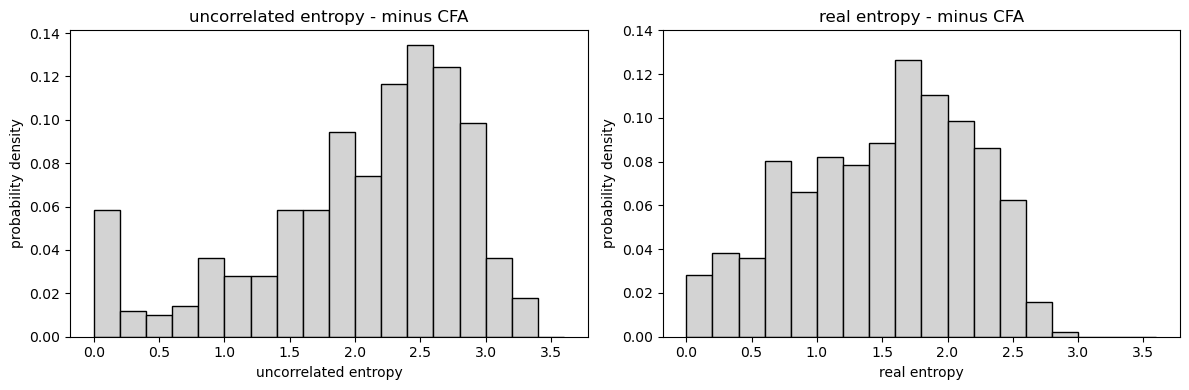

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate and normalize values for uncorrelated entropy
values_uncor, bins = np.histogram(
    data_done["uncorrelated_entropy"], bins=np.linspace(0, 3.6, 19)
)
values_uncor = values_uncor / sum(values_uncor)

# Calculate and normalize values for real entropy
values_real, bins = np.histogram(
    data_done["minus_cfa real entropy"], bins= bins)

values_real = values_real / sum(values_real)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

axes[0].bar(
    bins[:-1],
    values_uncor,
    align="edge",
    width=bins[1] - bins[0],
    color="lightgrey",
    edgecolor="black",
)
axes[0].set_title("uncorrelated entropy - minus CFA")
axes[0].set_ylabel("probability density")
axes[0].set_xlabel("uncorrelated entropy")

axes[1].bar(
    bins[:-1],
    values_real,
    align="edge",
    width=bins[1] - bins[0],
    color="lightgrey",
    edgecolor="black",
)
axes[1].set_title("real entropy - minus CFA")
axes[1].set_ylabel("probability density")
axes[1].set_xlabel("real entropy")
axes[1].set_ylim(0, 0.14)

plt.tight_layout()
plt.show()

## correlated plots

In [50]:
df1 = data_done[data_done["party"] == "Democrat"]
df2 = data_done[data_done["party"] == "Republican"]

# normalize values for uncor + real entropy for Democrat
values_uncor_d, bins = np.histogram(
    df1["uncorrelated_entropy"], bins=np.linspace(0, 3.6, 19)
)
values_uncor_d = values_uncor_d / sum(values_uncor_d)

values_real_d, bins = np.histogram(
    df1["minus_cfa real entropy"], bins=np.linspace(0, 3.6, 19)
)
values_real_d = values_real_d / sum(values_real_d)

# normalize values for uncor + real entropy for Republican
values_uncor_r, bins = np.histogram(df2["uncorrelated_entropy"], bins=bins)
values_uncor_r = values_uncor_r / sum(values_uncor_r)

values_real_r, bins = np.histogram(df2["minus_cfa real entropy"], bins=bins)
values_real_r = values_real_r / sum(values_real_r)

In [51]:
# ensure the line starts at 0 + ends at 0

# uncor
values_uncor_d = np.insert(values_uncor_d, 0, 0)
values_uncor_d = np.append(values_uncor_d, 0)

values_uncor_r = np.insert(values_uncor_r, 0, 0)
values_uncor_r = np.append(values_uncor_r, 0)

# real
values_real_d = np.insert(values_real_d, 0, 0)
values_real_d = np.append(values_real_d, 0)

values_real_r = np.insert(values_real_r, 0, 0)
values_real_r = np.append(values_real_r, 0)

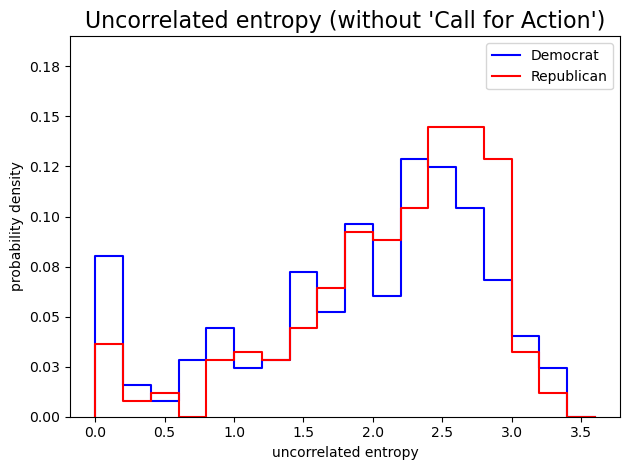

In [49]:
bins = np.append(bins, bins[-1] + (bins[1] - bins[0]))

plt.step(
    bins[:-1],
    values_uncor_d[:-1],
    label="Democrat",
    color="blue",
)

plt.step(
    bins[:-1],
    values_uncor_r[:-1],
    label="Republican",
    color="red",
)

plt.title("Uncorrelated entropy (without 'Call for Action')", fontsize=16)
plt.ylabel("probability density")
plt.xlabel("uncorrelated entropy")
plt.legend()
plt.ylim(0, 0.19)
plt.ylim(0, 0.19)
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter("%.2f"))


plt.tight_layout()

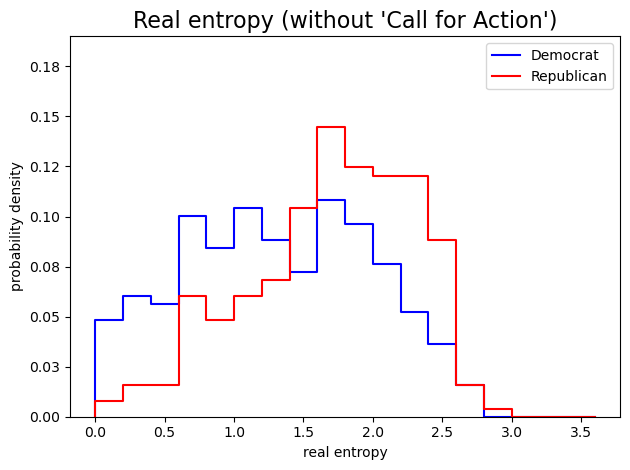

In [52]:
bins = np.append(bins, bins[-1] + (bins[1] - bins[0]))

plt.step(
    bins[:-1],
    values_real_d[:-1],
    label="Democrat",
    color="blue",
)

plt.step(
    bins[:-1],
    values_real_r[:-1],
    label="Republican",
    color="red",
)

plt.title("Real entropy (without 'Call for Action')", fontsize=16)
plt.ylabel("probability density")
plt.xlabel("real entropy")
plt.legend()
plt.ylim(0, 0.19)
plt.ylim(0, 0.19)

plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter("%.2f"))


plt.tight_layout()

## Kolmogorov-Smirnov test

In [ ]:
## https://www.geeksforgeeks.org/kolmogorov-smirnov-test-ks-test/

In [2]:
import pandas as pd
from scipy.stats import ks_2samp

In [41]:
ks = pd.read_csv('cola_entropy.csv')

In [44]:
#filter away bernie + alex for stats sake
id = [124955570892789, 1316372698453411]
ks = ks[~ks["page_id"].isin(id)]

In [91]:
ks_d = ks[ks["party"] == "Democrat"]
ks_r = ks[ks["party"] == "Republican"]

In [46]:
## Kolmogorov-Smirnow test uncor entropy
sample_d_uncor = ks_d["uncor entropy"]
sample_r_uncor = ks_r["uncor entropy"]

ks_statistic, p_value = ks_2samp(sample_d_uncor, sample_r_uncor)

print(f"Comparing uncorrelated entropy across the two parties")
print(f"Kolmogorov–Smirnov Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print(
        "Reject the null hypothesis. The two samples come from different distributions."
    )
else:
    print(
        "Fail to reject the null hypothesis. There is not enough evidence to suggest different distributions."
    )

Comparing uncorrelated entropy across the two parties
Kolmogorov–Smirnov Statistic: 0.1597709613910639
P-value: 0.0023502998096288875
Reject the null hypothesis. The two samples come from different distributions.


In [48]:
## Kolmogorov-Smirnow test real entropy
sample_d_real = ks_d["real entropy"]
sample_r_real = ks_r["real entropy"]
ks_statistic, p_value = ks_2samp(sample_d_real, sample_r_real)

print(f"Comparing real entropy across the two parties")
print(f"Kolmogorov–Smirnov Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print(
        "Reject the null hypothesis. The two samples come from different distributions."
    )
else:
    print(
        "Fail to reject the null hypothesis. There is not enough evidence to suggest different distributions."
    )

Comparing real entropy across the two parties
Kolmogorov–Smirnov Statistic: 0.2512812035047115
P-value: 1.163138154378667e-07
Reject the null hypothesis. The two samples come from different distributions.


In [86]:
## Kolmogorov-Smirnow uncor entropy >=2

# filtering away Steven Cohen from dataset, because he has no rows after setting th and has a nan value
id = [6358769182]
ks_d = ks_d[~ks_d["page_id"].isin(id)]

sample1 = ks_d["real entropy >=2"]
sample2 = ks_r["real entropy >=2"]
ks_statistic, p_value = ks_2samp(sample1, sample2)

print(f"Comparing uncor entropy >=2")
print(f"Kolmogorov–Smirnov Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print(
        "Reject the null hypothesis. The two samples come from different distributions."
    )
else:
    print(
        "Fail to reject the null hypothesis. There is not enough evidence to suggest different distributions."
    )

Comparing uncor entropy >=2
Kolmogorov–Smirnov Statistic: 0.24104637480010863
P-value: 4.549145298767737e-07
Reject the null hypothesis. The two samples come from different distributions.


In [87]:
## Kolmogorov-Smirnow real entropy >=2

sample1 = ks_d["uncor entropy >=2"]
sample2 = ks_r["uncor entropy >=2"]
ks_statistic, p_value = ks_2samp(sample1, sample2)

print(f"Comparing uncor entropy >=2")
print(f"Kolmogorov–Smirnov Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print(
        "Reject the null hypothesis. The two samples come from different distributions."
    )
else:
    print(
        "Fail to reject the null hypothesis. There is not enough evidence to suggest different distributions."
    )

Comparing uncor entropy >=2
Kolmogorov–Smirnov Statistic: 0.15846483420330085
P-value: 0.0026475372761390597
Reject the null hypothesis. The two samples come from different distributions.


In [88]:
## Kolmogorov-Smirnow uncor entropy >=4

# filtering away Shelby Labs from dataset, because he has no rows after setting th and has a nan value
id = [108358104117725]
ks_r = ks_r[~ks_r["page_id"].isin(id)]

sample1 = ks_d["uncor entropy >=4"]
sample2 = ks_r["uncor entropy >=4"]
ks_statistic, p_value = ks_2samp(sample1, sample2)

print(f"Comparing uncor entropy >=4")
print(f"Kolmogorov–Smirnov Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print(
        "Reject the null hypothesis. The two samples come from different distributions."
    )
else:
    print(
        "Fail to reject the null hypothesis. There is not enough evidence to suggest different distributions."
    )

Comparing uncor entropy >=4
Kolmogorov–Smirnov Statistic: 0.16566703017084697
P-value: 0.0014573374611393107
Reject the null hypothesis. The two samples come from different distributions.


In [90]:
## Kolmogorov-Smirnow real entropy >=4

sample1 = ks_d["real_entropy >=4"]
sample2 = ks_r["real_entropy >=4"]
ks_statistic, p_value = ks_2samp(sample1, sample2)

print(f"Comparing real entropy >=4")
print(f"Kolmogorov–Smirnov Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print(
        "Reject the null hypothesis. The two samples come from different distributions."
    )
else:
    print(
        "Fail to reject the null hypothesis. There is not enough evidence to suggest different distributions."
    )

Comparing real entropy >=4
Kolmogorov–Smirnov Statistic: 0.2324912153156428
P-value: 1.3592746595000357e-06
Reject the null hypothesis. The two samples come from different distributions.


## sammenligner med minus CFA

In [95]:
df1 = data_done[data_done["party"] == "Democrat"]
df2 = data_done[data_done["party"] == "Republican"]

In [101]:
sample1 = ks_d["uncor entropy"]
sample2 = df1["uncorrelated_entropy"] # where there is no
ks_statistic, p_value = ks_2samp(sample1, sample2)

print(f"Comparing uncorrelated entropy for DEMOCRATS with original dataset vs minus call for action")
print(f"Kolmogorov–Smirnov Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print(
        "Reject the null hypothesis. The two samples come from different distributions."
    )
else:
    print(
        "Fail to reject the null hypothesis. There is not enough evidence to suggest different distributions."
    )

Comparing uncorrelated entropy for DEMOCRATS with original dataset vs minus call for action
Kolmogorov–Smirnov Statistic: 0.316551376609098
P-value: 7.408934218078916e-12
Reject the null hypothesis. The two samples come from different distributions.


In [102]:
sample1 = ks_r["uncor entropy"]
sample2 = df2["uncorrelated_entropy"]
ks_statistic, p_value = ks_2samp(sample1, sample2)

print(f"Comparing uncorrelated entropy for REPUBLICANS with original dataset vs minus call for action")
print(f"Kolmogorov–Smirnov Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print(
        "Reject the null hypothesis. The two samples come from different distributions."
    )
else:
    print(
        "Fail to reject the null hypothesis. There is not enough evidence to suggest different distributions."
    )

Comparing uncorrelated entropy for REPUBLICANS with original dataset vs minus call for action
Kolmogorov–Smirnov Statistic: 0.33669857294791816
P-value: 3.817094528289899e-13
Reject the null hypothesis. The two samples come from different distributions.


In [103]:
sample1 = ks_d["real entropy"]
sample2 = df1["minus_cfa real entropy"]
ks_statistic, p_value = ks_2samp(sample1, sample2)

print(
    f"Comparing real entropy for DEMOCRATS with original dataset vs minus call for action"
)
print(f"Kolmogorov–Smirnov Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print(
        "Reject the null hypothesis. The two samples come from different distributions."
    )
else:
    print(
        "Fail to reject the null hypothesis. There is not enough evidence to suggest different distributions."
    )

Comparing real entropy for DEMOCRATS with original dataset vs minus call for action
Kolmogorov–Smirnov Statistic: 0.21236275902087437
P-value: 1.5040526371612142e-05
Reject the null hypothesis. The two samples come from different distributions.


In [104]:
sample1 = ks_r["real entropy"]
sample2 = df2["minus_cfa real entropy"]
ks_statistic, p_value = ks_2samp(sample1, sample2)

print(
    f"Comparing real entropy for REPUBLICANS with original dataset vs minus call for action"
)
print(f"Kolmogorov–Smirnov Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print(
        "Reject the null hypothesis. The two samples come from different distributions."
    )
else:
    print(
        "Fail to reject the null hypothesis. There is not enough evidence to suggest different distributions."
    )

Comparing real entropy for REPUBLICANS with original dataset vs minus call for action
Kolmogorov–Smirnov Statistic: 0.27574328936298553
P-value: 6.285264524526123e-09
Reject the null hypothesis. The two samples come from different distributions.
